In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [22]:
df =pd.read_parquet('train.parquet')
df.head(5)

,id,class,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises
0,367,edible,bell,scaly,yellow,almond,free,close,broad,black,...,white,white,partial,white,one,pendant,brown,scattered,grasses,Bruises
1,5123,poisonous,convex,smooth,red,foul,free,close,narrow,buff,...,white,pink,partial,white,one,evanescent,white,several,paths,No presenta
2,2864,edible,convex,fibrous,green,null,free,close,broad,pink,...,pink,white,partial,white,one,pendant,brown,several,wood,Bruises
3,4674,poisonous,flat,smooth,white,foul,free,close,broad,pink,...,white,white,partial,white,one,pendant,chocolate,scattered,grasses,Bruises
4,1210,edible,convex,smooth,white,null,free,crowded,broad,black,...,white,white,partial,white,one,evanescent,black,abundant,grasses,No presenta


In [23]:
df = df.set_index('id')
df.head()

,class,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises
id,,,,,,,,,,,,,,,,,,,,,
367,edible,bell,scaly,yellow,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,scattered,grasses,Bruises
5123,poisonous,convex,smooth,red,foul,free,close,narrow,buff,tapering,...,white,pink,partial,white,one,evanescent,white,several,paths,No presenta
2864,edible,convex,fibrous,green,null,free,close,broad,pink,tapering,...,pink,white,partial,white,one,pendant,brown,several,wood,Bruises
4674,poisonous,flat,smooth,white,foul,free,close,broad,pink,tapering,...,white,white,partial,white,one,pendant,chocolate,scattered,grasses,Bruises
1210,edible,convex,smooth,white,null,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,black,abundant,grasses,No presenta


In [24]:
df['cap_shape'].unique()

array(['bell', 'convex', 'flat', 'sunken', 'knobbed', 'c'], dtype=object)

In [25]:
df['class'] = df['class'].map({'edible': 0, 'poisonous': 1})
df['gill_attachment'] = df['gill_attachment'].map({'free': 1, 'attached': 0 })
df['stalk_shape'] = df['stalk_shape'].map({'enlarging': 1, 'tapering': 0})
df['veil_type'] = df['veil_type'].map({'partial': 1})
df['ring_number'] = df['ring_number'].map({'one': 1, 'two': 2, 'null':0})
df['gill_size'] = df['gill_size'].map({'broad': 1, 'narrow': 0})
df['gill_spacing'] = df['gill_spacing'].map({'close': 1, 'crowded': 0})
df['bruises'] = df['bruises'].map({'Bruises': 1, 'No presenta': 0})


df.head()

,class,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises
id,,,,,,,,,,,,,,,,,,,,,
367,0,bell,scaly,yellow,almond,1,1,1,black,1,...,white,white,1,white,1,pendant,brown,scattered,grasses,1
5123,1,convex,smooth,red,foul,1,1,0,buff,0,...,white,pink,1,white,1,evanescent,white,several,paths,0
2864,0,convex,fibrous,green,null,1,1,1,pink,0,...,pink,white,1,white,1,pendant,brown,several,wood,1
4674,1,flat,smooth,white,foul,1,1,1,pink,0,...,white,white,1,white,1,pendant,chocolate,scattered,grasses,1
1210,0,convex,smooth,white,null,1,0,1,black,0,...,white,white,1,white,1,evanescent,black,abundant,grasses,0


In [26]:
df.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'bruises'],
      dtype='object')

In [27]:
print(df['cap_shape'].unique())
print(df['cap_surface'].unique())
print(df['gill_color'].unique())
print(df['cap_color'].unique())
print(df['odor'].unique())
print(df['stalk_root'].unique())
print(df['stalk_surface_below_ring'].unique())
print(df['stalk_surface_above_ring'].unique())
print(df['stalk_color_below_ring'].unique())
print(df['stalk_color_above_ring'].unique())
print(df['veil_color'].unique())
print(df['spore_print_color'].unique())
print(df['ring_type'].unique())
print(df['population'].unique())
print(df['habitat'].unique())

['bell' 'convex' 'flat' 'sunken' 'knobbed' 'c']
['scaly' 'smooth' 'fibrous']
['black' 'buff' 'pink' 'purple' 'chocolate' 'white' 'brown' 'gray' 'red'
 'orange' 'yellow' 'green']
['yellow' 'red' 'green' 'white' 'brown' 'pink' 'cinnamon' 'buff' 'purple']
['almond' 'foul' 'null' 'spicy' 'creosote' 'anise' 'fishy' 'pungent'
 'musty']
['club' '?' 'bulbous' 'equal' 'rooted']
['smooth' 'silky' 'fibrous' 'scaly']
['smooth' 'silky' 'fibrous' 'scaly']
['white' 'pink' 'gray' 'buff' 'brown' 'red' 'orange' 'cinnamon' 'yellow']
['white' 'pink' 'gray' 'red' 'buff' 'brown' 'orange' 'cinnamon' 'yellow']
['white' 'orange' 'brown' 'yellow']
['brown' 'white' 'chocolate' 'black' 'purple' 'buff' 'yellow' 'green'
 'orange']
['pendant' 'evanescent' 'large' 'flaring' 'null']
['scattered' 'several' 'abundant' 'solitary' 'clustered' 'numerous']
['grasses' 'paths' 'wood' 'leaves' 'urban' 'waste' 'meadows']


In [28]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar la codificación en cada columna categórica
df['cap_shape'] = le.fit_transform(df['cap_shape'])
df['cap_surface'] = le.fit_transform(df['cap_surface'])
df['gill_color'] = le.fit_transform(df['gill_color'])
df['cap_color'] = le.fit_transform(df['cap_color'])
df['odor'] = le.fit_transform(df['odor'])
df['stalk_root'] = le.fit_transform(df['stalk_root'])
df['stalk_surface_below_ring'] = le.fit_transform(df['stalk_surface_below_ring'])
df['stalk_surface_above_ring'] = le.fit_transform(df['stalk_surface_above_ring'])
df['stalk_color_below_ring'] = le.fit_transform(df['stalk_color_below_ring'])
df['stalk_color_above_ring'] = le.fit_transform(df['stalk_color_above_ring'])
df['veil_color'] = le.fit_transform(df['veil_color'])
df['spore_print_color'] = le.fit_transform(df['spore_print_color'])
df['ring_type'] = le.fit_transform(df['ring_type'])
df['population'] = le.fit_transform(df['population'])
df['habitat'] = le.fit_transform(df['habitat'])


df.head()

,class,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises
id,,,,,,,,,,,,,,,,,,,,,
367,0,0,1,8,0,1,1,1,0,1,...,7,7,1,2,1,4,1,3,0,1
5123,1,2,2,6,4,1,1,0,2,0,...,7,5,1,2,1,0,7,4,3,0
2864,0,2,0,3,6,1,1,1,7,0,...,5,7,1,2,1,4,1,4,6,1
4674,1,3,2,7,4,1,1,1,7,0,...,7,7,1,2,1,4,3,3,0,1
1210,0,2,2,7,6,1,0,1,0,0,...,7,7,1,2,1,0,0,0,0,0


In [29]:
df['class'].value_counts()


class
0    2970
1    1633
Name: count, dtype: int64

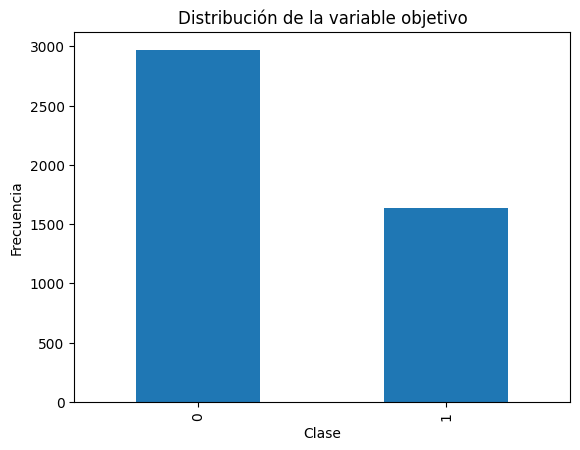

In [30]:
df['class'].value_counts().plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable objetivo')
plt.show()


In [31]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['class'])  # Variables independientes
y = df['class']  # Variable objetivo

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Convertir nuevamente en DataFrame
df = pd.concat([pd.DataFrame(X, columns=X.columns), pd.DataFrame(y, columns=['class'])], axis=1)


In [32]:
df

,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises,class
0,0,1,8,0,1,1,1,0,1,2,...,7,1,2,1,4,1,3,0,1,0
1,2,2,6,4,1,1,0,2,0,0,...,5,1,2,1,0,7,4,3,0,1
2,2,0,3,6,1,1,1,7,0,1,...,7,1,2,1,4,1,4,6,1,0
3,3,2,7,4,1,1,1,7,0,1,...,7,1,2,1,4,3,3,0,1,1
4,2,2,7,6,1,0,1,0,0,3,...,7,1,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,4,1,6,8,1,1,0,2,0,0,...,7,1,2,1,0,7,4,3,0,1
5936,2,1,0,7,1,1,0,0,1,3,...,7,1,2,1,4,1,3,0,1,1
5937,3,1,0,3,1,1,0,2,0,0,...,7,1,2,1,0,7,4,1,0,1
5938,2,1,8,4,1,1,1,7,1,1,...,0,1,2,1,2,3,4,0,0,1


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo de RandomForest para obtener la importancia de las características
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener la importancia de las características
importances = rf.feature_importances_
features = X.columns

# Ordenar las características por importancia (de mayor a menor)
indices = np.argsort(importances)[::-1]

# Mostrar las 9 características con menor importancia
least_important_features = features[indices[-9:]]
print("Las 9 características con menor importancia son:", least_important_features)

# Eliminar las 9 características con menor importancia
X = X.drop(columns=least_important_features)

# Verificar el nuevo dataset
print("Nuevo conjunto de datos:", X.shape)



Las 9 características con menor importancia son: Index(['stalk_color_below_ring', 'ring_number', 'stalk_color_above_ring',
       'cap_surface', 'cap_color', 'cap_shape', 'veil_color',
       'gill_attachment', 'veil_type'],
      dtype='object')
Nuevo conjunto de datos: (5940, 13)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar y entrenar el modelo con las características reducidas
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       594

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



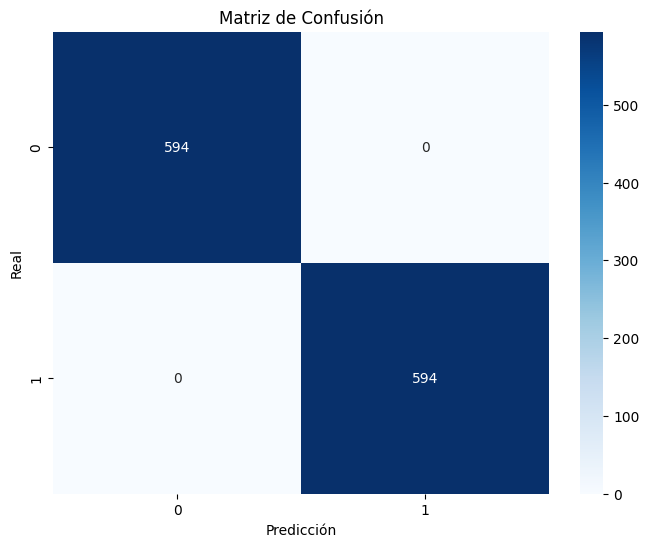

In [35]:
# Hacer predicciones con el modelo entrenado
y = rf.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y)
classification_rep = classification_report(y_test, y)
conf_matrix = confusion_matrix(y_test, y)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Matriz de Confusión")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


In [36]:
from sklearn.metrics import f1_score

# Calcular el F1-Score
f1 = f1_score(y_test, y, average='weighted')  # 'weighted' toma en cuenta el desbalance de clases
print(f"F1-Score (Weighted): {f1}")


F1-Score (Weighted): 1.0


In [37]:
# Suponiendo que tienes el archivo de test llamado "test.csv"
df_test = pd.read_csv('test.csv')

df_test


,id,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1483,Flat,Fibrous,Brown,No Bruises,NaN,Free,Crowded,Broad,Chocolate,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses
1,5111,Convex,Scaly,Red,No Bruises,Foul,Free,Close,Narrow,Buff,...,Silky,White,White,Partial,White,One,Evanescent,White,Several,Paths
2,3569,Flat,Scaly,Red,Bruises,NaN,Free,Close,Broad,White,...,Smooth,Gray,White,Partial,White,One,Pendant,Brown,Solitary,Wood
3,2426,Convex,Fibrous,Green,No Bruises,Foul,Free,Close,Broad,Gray,...,Silky,Brown,Buff,Partial,White,One,Large,Chocolate,Solitary,Paths
4,2749,Convex,Scaly,Green,Bruises,NaN,Free,Close,Broad,Purple,...,Smooth,Gray,White,Partial,White,One,Pendant,Black,Solitary,Wood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,2090,Convex,Fibrous,Green,Bruises,NaN,Free,Close,Broad,White,...,Smooth,White,Gray,Partial,White,One,Pendant,Black,Solitary,Wood
1970,2536,Convex,Scaly,Brown,Bruises,NaN,Free,Close,Broad,Pink,...,Smooth,White,Gray,Partial,White,One,Pendant,Brown,Several,Wood
1971,1215,Convex,Scaly,Red,Bruises,NaN,Free,Close,Broad,Brown,...,Smooth,Pink,White,Partial,White,One,Pendant,Brown,Solitary,Wood
1972,1896,Flat,Smooth,Brown,No Bruises,NaN,Free,Crowded,Broad,Chocolate,...,Fibrous,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


In [38]:
df_test = df_test.set_index('id')
df_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
id,,,,,,,,,,,,,,,,,,,,,
1483,Flat,Fibrous,Brown,No Bruises,NaN,Free,Crowded,Broad,Chocolate,Tapering,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses
5111,Convex,Scaly,Red,No Bruises,Foul,Free,Close,Narrow,Buff,Tapering,...,Silky,White,White,Partial,White,One,Evanescent,White,Several,Paths
3569,Flat,Scaly,Red,Bruises,NaN,Free,Close,Broad,White,Tapering,...,Smooth,Gray,White,Partial,White,One,Pendant,Brown,Solitary,Wood
2426,Convex,Fibrous,Green,No Bruises,Foul,Free,Close,Broad,Gray,Enlarging,...,Silky,Brown,Buff,Partial,White,One,Large,Chocolate,Solitary,Paths
2749,Convex,Scaly,Green,Bruises,NaN,Free,Close,Broad,Purple,Tapering,...,Smooth,Gray,White,Partial,White,One,Pendant,Black,Solitary,Wood


In [39]:
df_test['gill-attachment'] = df_test['gill-attachment'].map({'Free': 1, 'Attached': 0 })
df_test['stalk-shape'] = df_test['stalk-shape'].map({'Enlarging': 1, 'Tapering': 0})
df_test['veil-type'] = df_test['veil-type'].map({'Partial': 1})
df_test['ring-number'] = df_test['ring-number'].map({'One': 1, 'Two': 2, 'Null':0})
df_test['gill-size'] = df_test['gill-size'].map({'Broad': 1, 'Narrow': 0})
df_test['gill-spacing'] = df_test['gill-spacing'].map({'Close': 1, 'Crowded': 0})
df_test['bruises'] = df_test['bruises'].map({'Bruises': 1, 'No Bruises': 0})


df_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
id,,,,,,,,,,,,,,,,,,,,,
1483,Flat,Fibrous,Brown,0,NaN,1,0,1,Chocolate,0,...,Smooth,White,White,1,White,1.0,Evanescent,Brown,Abundant,Grasses
5111,Convex,Scaly,Red,0,Foul,1,1,0,Buff,0,...,Silky,White,White,1,White,1.0,Evanescent,White,Several,Paths
3569,Flat,Scaly,Red,1,NaN,1,1,1,White,0,...,Smooth,Gray,White,1,White,1.0,Pendant,Brown,Solitary,Wood
2426,Convex,Fibrous,Green,0,Foul,1,1,1,Gray,1,...,Silky,Brown,Buff,1,White,1.0,Large,Chocolate,Solitary,Paths
2749,Convex,Scaly,Green,1,NaN,1,1,1,Purple,0,...,Smooth,Gray,White,1,White,1.0,Pendant,Black,Solitary,Wood


In [40]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar la codificación en cada columna categórica
df_test['cap-shape'] = le.fit_transform(df_test['cap-shape'])
df_test['cap-surface'] = le.fit_transform(df_test['cap-surface'])
df_test['gill-color'] = le.fit_transform(df_test['gill-color'])
df_test['cap-color'] = le.fit_transform(df_test['cap-color'])
df_test['odor'] = le.fit_transform(df_test['odor'])
df_test['stalk-root'] = le.fit_transform(df_test['stalk-root'])
df_test['stalk-surface-below-ring'] = le.fit_transform(df_test['stalk-surface-below-ring'])
df_test['stalk-surface-above-ring'] = le.fit_transform(df_test['stalk-surface-above-ring'])
df_test['stalk-color-below-ring'] = le.fit_transform(df_test['stalk-color-below-ring'])
df_test['stalk-color-above-ring'] = le.fit_transform(df_test['stalk-color-above-ring'])
df_test['veil-color'] = le.fit_transform(df_test['veil-color'])
df_test['spore-print-color'] = le.fit_transform(df_test['spore-print-color'])
df_test['ring-type'] = le.fit_transform(df_test['ring-type'])
df_test['population'] = le.fit_transform(df_test['population'])
df_test['habitat'] = le.fit_transform(df_test['habitat'])


df_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
id,,,,,,,,,,,,,,,,,,,,,
1483,2,0,0,0,8,1,0,1,3,0,...,3,7,7,1,2,1.0,0,1,0,0
5111,1,2,6,0,4,1,1,0,2,0,...,2,7,7,1,2,1.0,0,7,4,3
3569,2,2,6,1,8,1,1,1,10,0,...,3,3,7,1,2,1.0,3,1,5,6
2426,1,0,3,0,4,1,1,1,4,1,...,2,0,1,1,2,1.0,2,3,5,3
2749,1,2,3,1,8,1,1,1,8,0,...,3,3,7,1,2,1.0,3,0,5,6


In [41]:
df_test.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [42]:
X_pred = df_test.drop(['stalk-color-below-ring', 'ring-number', 'stalk-color-above-ring',
       'cap-surface', 'cap-color', 'cap-shape', 'veil-color',
       'gill-attachment', 'veil-type'], axis=1)
X_pred.shape

(1974, 13)

In [43]:
# Reemplazar los guiones por guiones bajos en los nombres de las columnas
X_pred.columns = X_pred.columns.str.replace('-', '_')

# Reorganizar las columnas de X_pred para que coincidan con el orden de X_train
X_pred = X_pred[X.columns]
X_pred


,odor,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,ring_type,spore_print_color,population,habitat,bruises
id,,,,,,,,,,,,,
1483,8,0,1,3,0,3,3,3,0,1,0,0,0
5111,4,1,0,2,0,0,3,2,0,7,4,3,0
3569,8,1,1,10,0,1,3,3,3,1,5,6,1
2426,4,1,1,4,1,1,2,2,2,3,5,3,0
2749,8,1,1,8,0,1,3,3,3,0,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,8,1,1,10,0,1,3,3,3,0,5,6,1
2536,8,1,1,7,0,1,3,3,3,1,4,6,1
1215,8,1,1,1,0,1,3,3,3,1,5,6,1


In [44]:
X

,odor,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,ring_type,spore_print_color,population,habitat,bruises
0,0,1,1,0,1,2,3,3,4,1,3,0,1
1,4,1,0,2,0,0,2,2,0,7,4,3,0
2,6,1,1,7,0,1,3,3,4,1,4,6,1
3,4,1,1,7,0,1,0,0,4,3,3,0,1
4,6,0,1,0,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,8,1,0,2,0,0,2,3,0,7,4,3,0
5936,7,1,0,0,1,3,3,3,4,1,3,0,1
5937,3,1,0,2,0,0,3,2,0,7,4,1,0
5938,4,1,1,7,1,1,2,2,2,3,4,0,0


In [45]:
predictions_submit = rf.predict(X_pred)
predictions_submit

array([0, 1, 0, ..., 0, 0, 0])

In [46]:
sample = pd.read_csv("sample_solution.csv")

In [47]:
sample.head()

,id,class
0,1483,0
1,5111,1
2,3569,0
3,2426,1
4,2749,1


In [48]:
submission = pd.DataFrame({"id": sample['id'], "class": predictions_submit})

In [49]:
submission.head()

,id,class
0,1483,0
1,5111,1
2,3569,0
3,2426,1
4,2749,0


In [50]:
def chequeator(df_to_submit,version):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit['id'].all() == sample['id'].all():
                print("You're ready to submit!")
                submission.to_csv(f"submission_{version}.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")

In [52]:
chequeator(submission,2)

You're ready to submit!


NameError: name 'urllib' is not defined